# FoodWheel: Let the Food Choose For You
FoodWheel is a startup delivery service that takes away the struggle of deciding where to eat! FoodWheel picks you an amazing local restaurant and lets you order through the app. Senior leadership is getting ready for a big board meeting, and as the resident Data Analyst, you have been enlisted to help decipher data and create a presentation to answer several key questions:

- What cuisines does FoodWheel offer? Which areas should the company search for more restaurants to partner with?
- How has the average order amount changed over time? What does this say about the trajectory of the company?
- How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

In [268]:
import pandas as pd
from matplotlib import pyplot as plt
import re

def head(lst, n=5):
    # head n lines of list
    for i in range(min(n,len(lst))):
        print(i, ':', lst[i])

def chomp(str):
    return str.rstrip('\n\r')

quotes = lambda x: ['"' + a + '"' for a in x]

colors = ['lightskyblue', 'gold', 'lightcoral', 'gainsboro', 'royalblue', \
          'lightpink', 'darkseagreen', 'sienna', 'khaki', 'gold', 'violet', \
          'yellowgreen']

Obtain FoodWheel data. 
Codecademy did not make the csv available.
Somehow read_csv could still read it and print it. I copied it from
the screen and pasted into file raw_df.tst. Here's code to read it
and write it to a csv file.

In [269]:
def prep_restaurants(infile, outfile):
    # Read the data pasted into a file
#     with open('raw_df.txt', 'r') as f:
    with open(infile, 'r') as f:
        raw = f.readlines()
    f.close()

    # chomp
    raw = [chomp(l) for l in raw]
    # head(raw)

    # Separate into header and body
    header = raw[0]
    body = raw[1:]
    # head(body)

    # Split each line of body into words separated by spaces
    # Ignore first 2 words
    def words(lst):
        x = lst.split()[2:]
        restaurant = [' '.join(x[:-2])]
        return ' ,'.join(quotes(restaurant + x[-2:]))

    newbody = [ words(x) for x in body]
    # head(newbody)

    # Split the header
    newheader = ','.join(quotes(header.split()[1:]))

    # Output to a file
#     with open('restaurants.csv', 'w') as f:
    with open(outfile, 'w') as f:
        f.write('{}\n'.format(newheader))
        for a in newbody:
            f.write('{}\n'.format(a))
    f.close()

In [270]:
# Read the DataFrame

# Only needed once
# prep_restaurants('raw_df.txt', 'restaurants.csv')

restaurants = pd.read_csv('restaurants.csv')
restaurants.head()

,name,neighborhood,cuisine
0,Jongro BBQ,Midtown,Korean
1,Pocha 32,Midtown,Korean
2,Nom Wah Tea Parlor,Chinatown,Chinese
3,Robertas,Brooklyn,Pizza
4,Speedy Romeo,Brooklyn,Pizza


In [271]:
4. How many different types of cuisine does FoodWheel offer?

Object `offer` not found.


In [ ]:
4. How many different types of cuisine does FoodWheel offer

In [272]:
4. How many different types of cuisine does FoodWheel offer

SyntaxError: invalid syntax (<ipython-input-272-9c6a3586105b>, line 1)

In [ ]:
cuisine_options_count = restaurants.cuisine.nunique()
print(cuisine_options_count)

5. count the number of restaurants of each cuisine. Use groupby and count. Save your results to cuisine_counts

In [ ]:
cuisine_counts = restaurants.groupby('cuisine').count()['name'].reset_index()
cuisine_counts.columns = ['cuisine', 'num_restaurants']
cuisine_counts


#What cuisines does FoodWheel offer?
1.   creating two variables:

- cuisines contains the values of the column cuisine from cuisine_counts.
- counts contains the number of restaurants of each cuisine from cuisine_counts.

In [ ]:
cuisines = cuisine_counts['cuisine'].values
print(cuisines)
counts = cuisine_counts['num_restaurants'].values
print(counts)

2. use the values from counts to create a pie chart. Make sure that your pie chart includes:

- Labels for each cuisine (i.e, “American”, “Chinese”, etc.) from cuisines
- Percent labels using autopct
- A title
- Use plt.axis to make the pie chart a perfect circle
- plt.show() to display your chart

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
plt.axis('equal')
plt.pie(counts, colors=colors, autopct='%d%%', labels=cuisines)
plt.title('Number of Restaurants by Type of Cuisine')
plt.show()

### Orders Over Time
Read the orders.csv. Again it was not provided directly in Codecademy.
This time I will use a different process because print(df) did not
show all 500 lines, only 50.

In Codecademy, print(df) is replaced by:

    import re
    with open('orders.csv') as f:
        x = f.readlines()
    for l in x:
      l = re.sub('^[^,]*,', '', l)  # drop extra index column
      print(l.rstrip('\n\r'))
 
The result can be copied and pasted directly into file for use with read_csv.

In [ ]:
orders = pd.read_csv('orders.csv')
orders

Create a new column in orders called month that contains the month that the order was placed.

- Convert the string to a date object, and extract the name of the month.
- Use a lambda function to perform the work with apply method.

In [ ]:
# from datetime import date
from datetime import datetime

# Convert the string to a date object, and extract the name of the month.
# Use a lambda function to perform the work

fn = lambda x: datetime.strptime(x, '%m-%d-%Y').strftime('%B')
orders['month'] = orders.date.apply(fn)
orders

Group orders by month and get the average order price in each month. Save your answer to avg_order.

In [ ]:
avg_order = orders.groupby('month').price.mean().reset_index()
avg_order

Going to make a bar chart with this information. It would be nice if our bar chart had error bars. Calculate the standard deviation for the average price of orders for each month using std. Save this to std_order.

In [ ]:
std_order = orders.groupby('month').price.std().reset_index()
std_order

Create a set of axes using plt.subplot and saving them to the variable ax.

In [ ]:
bar_heights = avg_order.price.values
bar_heights

Create a variable with the standard deviation of prices in it by selecting the column price from std_order. Save this to bar_errors.

In [ ]:
bar_errors = std_order.price.values
bar_errors

Create a bar chart to share this data.

- Create an axes object called ax using plt.subplot.
- The height of each bar should come from bar_heights
- Use the standard deviations in bar_errors as the yerr
- The error capsize should be 5
- Make sure that you label each bar with the name of the month (i.e., 4 = April).
- Also be sure to label the y-axis
- Give your plot a descriptive title

In [ ]:
# fig, ax = plt.subplots(figsize=(8,6))
fig = plt.figure(figsize=(8,6))
ax = plt.subplot()
x = avg_order.month
avg_price = bar_heights
xpos = list(range(len(x)))
plt.bar(xpos, avg_price, yerr=bar_errors, capsize=5)
plt.title('Monthly Variation of Orders')
plt.xlabel('Months')
plt.ylabel('Orders')
ax.set_xticks(xpos)
ax.set_xticklabels(x)
plt.show()


### Customer Types

There is a range of amounts that customers spend on FoodWheel. Let’s investigate and aim to answer our final question:

- How much has each customer on FoodWheel spent over the past six months? What can this tell us about the average FoodWheel customer?

Start by grouping orders by customer_id and calculating the sum of price spent by each customer. Save your results to customer_amount.

In [276]:
customer_amount = orders.groupby('customer_id').price.sum().reset_index()
customer_amount

,customer_id,price
0,0,83.0
1,2,11.0
2,3,65.0
3,4,32.0
4,5,119.0
...,...,...
219,245,68.0
220,246,16.0
221,247,35.0
222,248,89.0


Create a histogram of this data.

- The range should be from 0 to 200
- The number of bins should be 40
- Label the x-axis Total Spent
- Label the y-axis Number of Customers
- Add a title

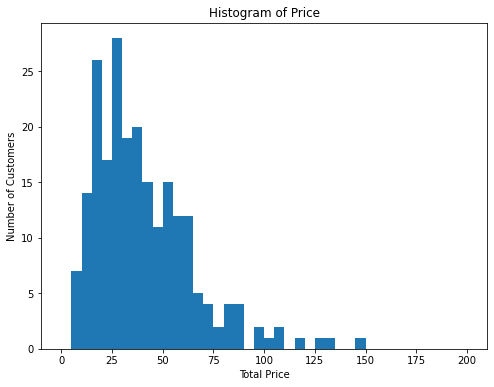

In [279]:
fig, ax = plt.subplots(figsize=(8,6))
x = customer_amount.price.values
plt.hist(x, range=(0,200), bins=40)
plt.title('Histogram of Price')
plt.xlabel('Total Price')
plt.ylabel('Number of Customers')
plt.show()